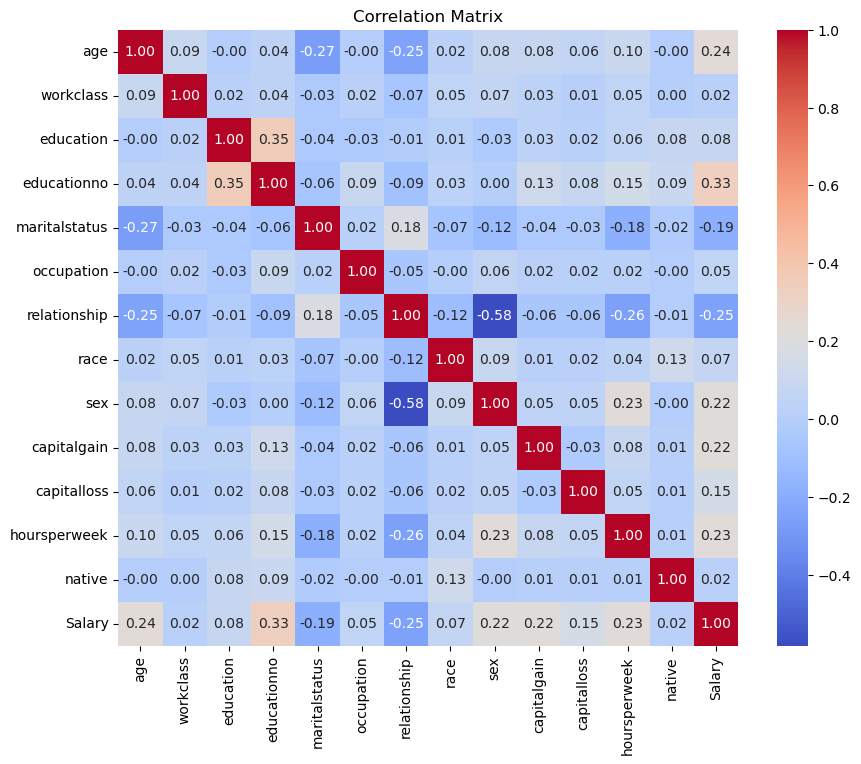

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

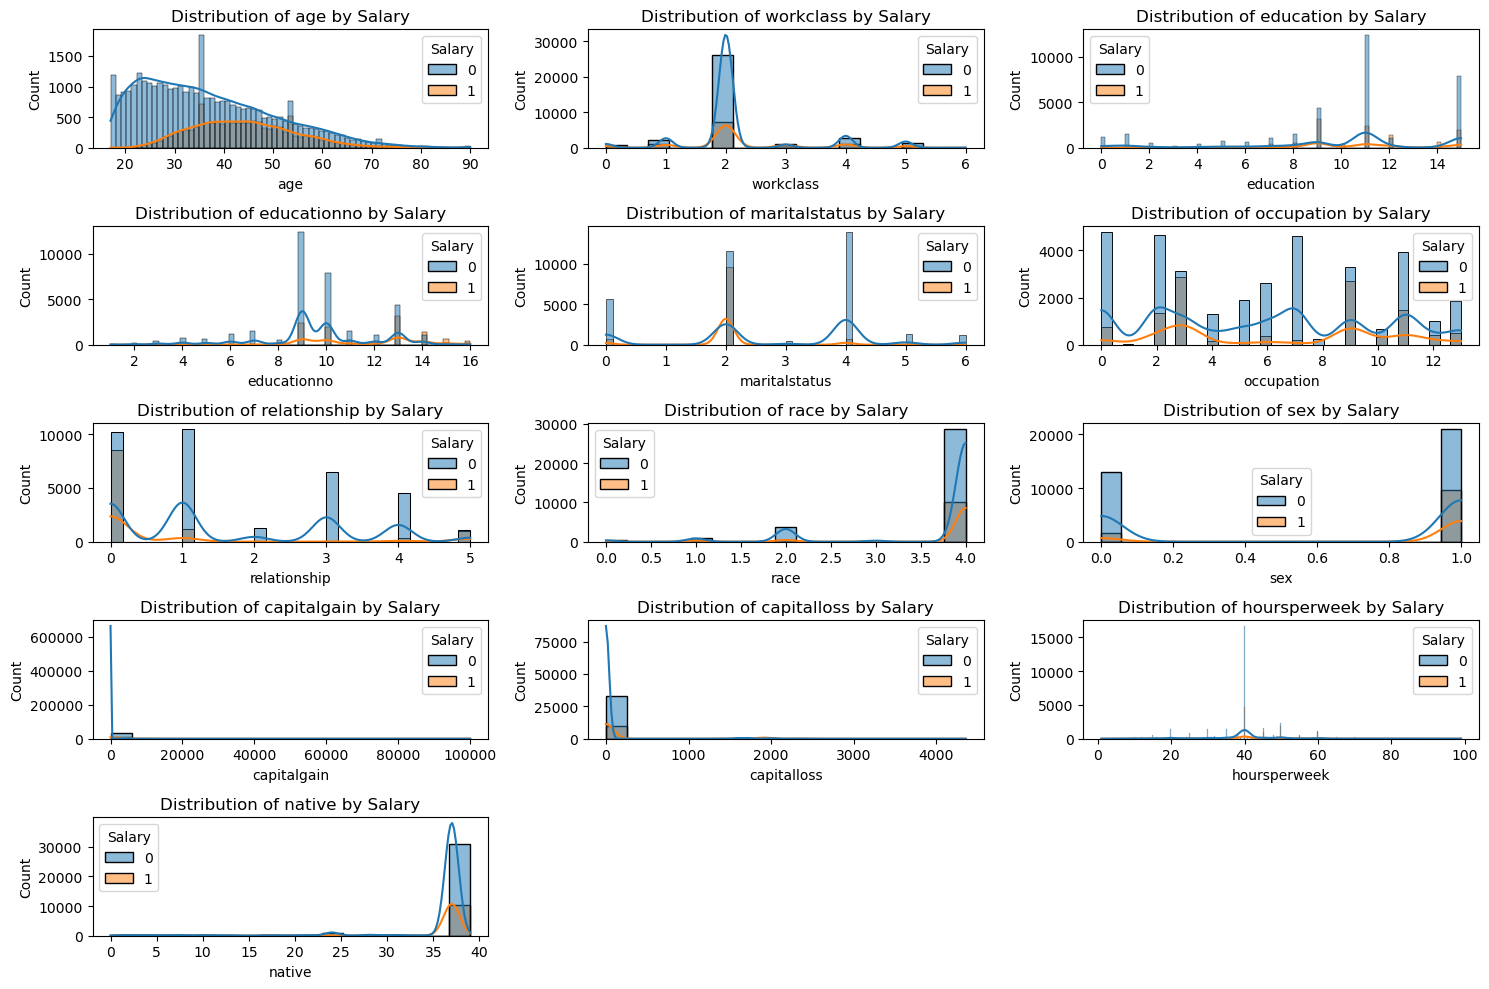

Accuracy: 0.7959093421779989

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      6806
           1       0.68      0.33      0.44      2239

    accuracy                           0.80      9045
   macro avg       0.75      0.64      0.66      9045
weighted avg       0.78      0.80      0.77      9045


Confusion Matrix:
[[6466  340]
 [1506  733]]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


test_data = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\Naive bayes\SalaryData_Test.csv")
train_data = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\Naive bayes\SalaryData_Train.csv")


data = pd.concat([train_data, test_data], ignore_index=True)


data.dropna(inplace=True)


label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


num_cols = len(data.columns) - 1 
rows = (num_cols - 1) // 3 + 1
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(data=data, x=column, hue='Salary', kde=True)
    plt.title(f'Distribution of {column} by Salary')
plt.tight_layout()
plt.show()


X = data.drop('Salary', axis=1)
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)


y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
